## Writing a Python Program that Recognizes Images
### by Long Nguyen

Congratulations for making it this far! In this notebook, we put together some of the functions implemented in the previous notebooks as well as finally implementing gradient descent to recognize handwritten digits. 

This homework notebook is supplemental to Lecture 6 of the series "Image Recognition with Neural Networks".


If you get stuck, see the Lecture 6's video for solutions. Here's a link to the [playlist](https://www.youtube.com/playlist?list=PLYNGZdVGGmHxfiQSulJm7eCKN-zOvQjao).

This code is adapted from Michael Nielsen's book: [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)

One main difference is that I vectorize this code. 

#### Feel free to copy and paste from your work on previous notebooks. 

In [9]:
from mnist_loader import load_data_wrapper
import numpy as np
import random
import matplotlib.pyplot as plt

In [10]:
training_data, validation_data, test_data = load_data_wrapper()

In [11]:
def plot_images(images):
    "Plot a list of MNIST images."
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.matshow(images[j][0].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [12]:
def predict(images, W1, W2, B1, B2):
    predictions = []
    for im in images:
        a = f(im[0], W1, W2, B1, B2)
        predictions.append(np.argmax(a))
    return predictions

#### Implement $\sigma(x)$. 

In [13]:
def sigmoid(x):
    """The sigmoid function."""
    return 1/(1+np.exp(-x))


#### Implement the derivative of $\sigma$. (Hint: $\sigma'(x)=\sigma(x)(1-\sigma(x))$)

In [14]:
def sigmoid_prime(x):
    """Derivative of the sigmoid function."""
    return sigmoid(x)*(1-sigmoid(x))


#### Implement the score function.

In [15]:
def f(x, W1, W2, B1, B2):
    """Return the output of the network if ``x`` is input image and
    W1, W2, B1 and B2 are the learnable weights. """
    Z1 = np.dot(W1,x)+B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+B2
    A2 = sigmoid(Z2)
    return A2
    


#### Implement vectorize_mini_batch.

In [16]:
def vectorize_mini_batch(mini_batch):
    """Given a minibatch of (image,label) tuples of a certain size
    return the tuple X,Y where X contains all of the images and Y contains
    all of the labels stacked horizontally """
    mini_batch_x = []
    mini_batch_y = []
    for k in range(0,len(mini_batch)):
        mini_batch_x.append(mini_batch[k][0])
        mini_batch_y.append(mini_batch[k][1])
        
    X = np.hstack(mini_batch_x)
    Y = np.hstack(mini_batch_y)
    return X, Y   

Suppose we have an $L$-layer neural network. For an $m\times n$ matrix $A$, let i-th column of A be denoted by $A[i]$. 

Let $\cdot$ denote matrix multiplication and $\odot$ denote element-wise multiplication. 

These are the four equations of backpropagation. 

\begin{align}
\frac{\partial J}{\partial Z_L}&=\frac{1}{m}(A_L-Y)\odot\sigma'(Z_L)\\
\frac{\partial J}{\partial Z_i}&=\frac{1}{m}W_{i+1}^T\cdot \frac{\partial J}{\partial Z_{i+1}}\odot\sigma'(Z_i)\\
\frac{\partial J}{\partial W_i}
&=\frac{\partial J}{\partial Z_i}\cdot A_{i-1}^T\\
\frac{\partial J}{\partial B_i}
&=\displaystyle\dfrac{1}{m}\sum_i \frac{\partial J}{\partial Z_i}[i]
\end{align}

#### Implement gradient descent. 

In [19]:
def SGD(training_data, epochs, mini_batch_size, eta, test_data):
    """Gradient descent. 
    Epochs: the number of times the entire training_data is examined.
    mini_batch_size: the number of images used to approximate the gradient 
    each step of gradient descent.
    eta: the learning rate or the step size.
    test_data: check accuracy of the model against the test_data every epoch.
    """
    n = len(training_data)
    n_test = len(test_data)
    
    W1 = np.random.randn(30,784)
    W2 = np.random.randn(10,30)
    B1 = np.random.randn(30,1)
    B2 = np.random.randn(10,1)
    
    for j in range(epochs):
        random.shuffle(training_data)
        for k in range(0, n, mini_batch_size):
            mini_batch = training_data[k: k+mini_batch_size]
            X, Y = vectorize_mini_batch(mini_batch)
            
            
            # feed forward
            Z1 = np.dot(W1,X)+B1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2,A1)+B2
            A2 = sigmoid(Z2)
            
            # backpropagate
            dZ2 = 1/mini_batch_size*(A2-Y)*sigmoid_prime(Z2)
            dW2 = np.dot(dZ2, A1.T)
            dB2 = 1/mini_batch_size*np.sum(dZ2, axis = 1, keepdims = True)
            
            dZ1 = 1/mini_batch_size*np.dot(W2.T, dZ2)*sigmoid_prime(Z1)
            dW1 = np.dot(dZ1, X.T)
            dB1 = 1/mini_batch_size*np.sum(dZ1, axis = 1, keepdims = True)
            
            # update parameters
            
            W2 = W2 - eta*dW2
            W1 = W1 - eta*dW1
            B2 = B2 - eta*dB2
            B1 = B1 - eta*dB1
            
            
        # after every epoch, check the accuracy of the model    
        test_results = [(np.argmax(f(x, W1, W2, B1, B2)), y) for (x, y) in test_data]
        num_correct = sum(int(x == y) for (x, y) in test_results)
        print("Epoch {} : {} / {}".format(j, num_correct, n_test));
        
    return W1, B1, W2, B2


In [20]:
W1, B1, W2, B2 = SGD(training_data, 30, 10, 3, test_data)

Epoch 0 : 8199 / 10000
Epoch 1 : 8683 / 10000
Epoch 2 : 8828 / 10000
Epoch 3 : 8985 / 10000
Epoch 4 : 9015 / 10000
Epoch 5 : 9074 / 10000
Epoch 6 : 9104 / 10000
Epoch 7 : 9119 / 10000
Epoch 8 : 9183 / 10000
Epoch 9 : 9161 / 10000
Epoch 10 : 9214 / 10000
Epoch 11 : 9226 / 10000
Epoch 12 : 9233 / 10000
Epoch 13 : 9246 / 10000
Epoch 14 : 9249 / 10000
Epoch 15 : 9260 / 10000
Epoch 16 : 9295 / 10000
Epoch 17 : 9285 / 10000
Epoch 18 : 9282 / 10000
Epoch 19 : 9290 / 10000
Epoch 20 : 9279 / 10000
Epoch 21 : 9285 / 10000
Epoch 22 : 9310 / 10000
Epoch 23 : 9315 / 10000
Epoch 24 : 9327 / 10000
Epoch 25 : 9301 / 10000
Epoch 26 : 9341 / 10000
Epoch 27 : 9331 / 10000
Epoch 28 : 9314 / 10000
Epoch 29 : 9337 / 10000


In [21]:
predict(training_data[0:10],W1,W2,B1,B2)

[8, 5, 2, 9, 0, 3, 6, 9, 9, 2]

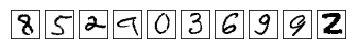

In [22]:
plot_images(training_data[0:10])